# **Hand Written Digits Recognistion(MNIST) Using MLP **

**Problem Statement** : Classification of given hand written digits into 10 categories(0-9) using Multi-layer perceptrons in Keras

 MNIST is a commonly used handwritten digit dataset consisting of 60,000 images in the training set and 10,000 images in the test set. So, each digit has 6000 images in the training set. The digits are size-normalized and centered in a fixed-size ( 28×28 ) image. 

In [4]:
!pip install PrettyTable

  Running setup.py bdist_wheel for PrettyTable ... - \ done
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built PrettyTable


In [5]:
#importing required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from prettytable import PrettyTable

#using tensorflow as backend
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
#changing the class_label into categorical using one-hot encoding
from keras.utils import to_categorical
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [6]:
#loading MNIST dataset and spliting into test and train sets randomly
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


Text(0.5,1,'Class-label : 5')

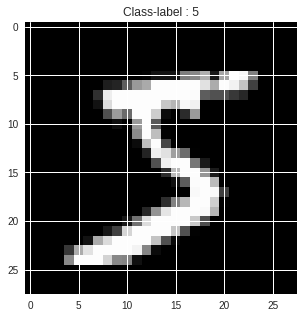

In [7]:
#checking few images in the dataset
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot()
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Class-label : {}".format(y_train[0]))

In [8]:
#checking the shape of the data

print('Training data shape : ', x_train.shape, y_train.shape)
 
print('Testing data shape : ', x_test.shape, y_train.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes) 

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (60000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [0]:
#flattening image of 28*28 inti 1*784
reshape_dim = 28*28

x_train = x_train.reshape(x_train.shape[0],reshape_dim)
x_test = x_test.reshape(x_test.shape[0],reshape_dim)

In [10]:
#checking the shape of the data after falttening
print("Training data shape :" ,x_train.shape)
print("Test data shape :" , x_test.shape)

Training data shape : (60000, 784)
Test data shape : (10000, 784)


In [11]:
#checking pixel values of first image
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
#change to float datatype and normalizing the pixel values of each image
x_train = x_train.astype("float32")
x_test =x_test.astype("float32")

#normalizing the data using min-max scaling with maximum value 255 and minimun value 0
x_train /=255
x_test /=255


In [10]:
#getting the pixel values of after min-max scaling
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

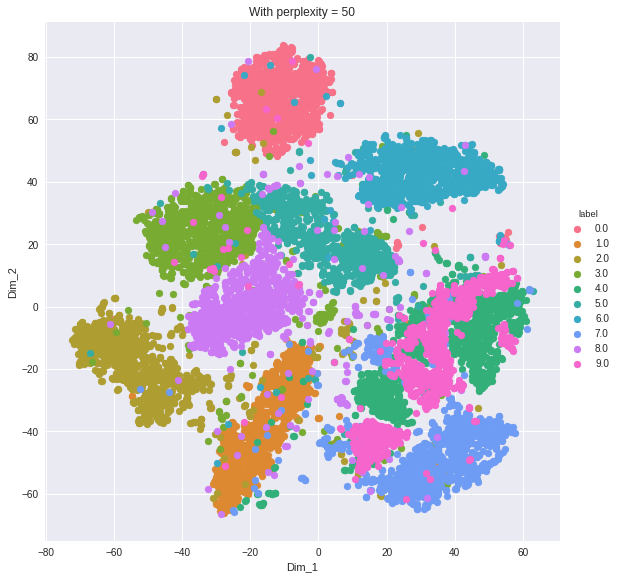

In [11]:
#t-sne visualzation of MNIST by taking 10000 data-points
labels = y_train[0:10000]
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(x_train[0:10000]) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

In [13]:
#converting class label into categorical using one-hot encoding
print("Class label first image" , y_train[0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Class label of first image after one-hot encoding" , y_train[0])

Class label first image 5
Class label of first image after one-hot encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#assigning model parameters
output_dim = 10 #as we are using softmax classifier and we have 10 class-labels for classification
input_dim = x_train.shape[1] #input dimeension will be 1*784 vactor
batch_size = 128 #size of randomly taken points for each epoch
n_epochs = 25 #number of iterations to reach optimal parameters

In [0]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
train_loss_list =[];
test_loss_list =[];
train_accuracy_list =[];
test_accuracy_list = []

# **Buidling a Multi-Layered Perceptron with 2 hidden Layers**

# **MLP+ReLU+Adam**

In [17]:
#stating a model
model_2 = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 2 hidden layers with softmax classifier
model_2.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_2.add(Dense(output_dim, activation = "softmax"))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
 #configuring the optimizer
model_2.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 68us/step - loss: 0.2214 - acc: 0.9353 - val_loss: 0.1121 - val_acc: 0.9650
Epoch 2/25
60000/60000 [==============================] - 3s 54us/step - loss: 0.0818 - acc: 0.9750 - val_loss: 0.0763 - val_acc: 0.9756
Epoch 3/25
60000/60000 [==============================] - 3s 54us/step - loss: 0.0508 - acc: 0.9839 - val_loss: 0.0765 - val_acc: 0.9754
Epoch 4/25
60000/60000 [==============================] - 3s 54us/step - loss: 0.0344 - acc: 0.9891 - val_loss: 0.0815 - val_acc: 0.9755
Epoch 5/25
60000/60000 [==============================] - 3s 54us/step - loss: 0.0252 - acc: 0.9921 - val_loss: 0.0633 - val_acc: 0.9811
Epoch 6/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.0220 - acc: 0.9932 - val_loss: 0.0731 - val_acc: 0.9799
Epoch 7/25
60000/60000 [==============================] - 3s 54us/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0720 - val_acc

In [20]:
#evaluating on test-data
[test_loss, test_acc] = model_2.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))


10000/10000 [==============================] - 1s 65us/step
Evaluation result on Test Data : Loss = 0.09304766570213614, accuracy = 98.25%


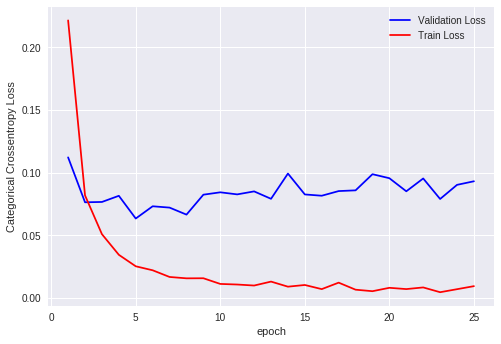

Text(0.5,1,'Accuracy Curves')

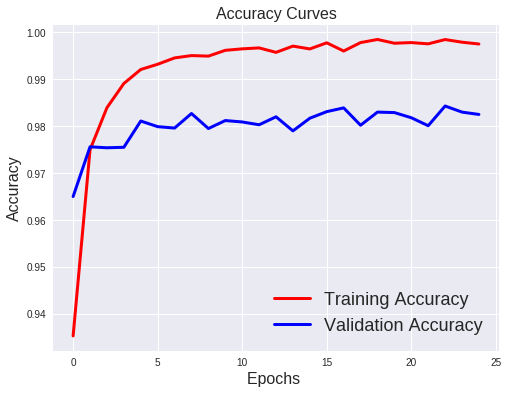

In [21]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations**:

We can see a good accuracy but if we see the loss and accuracy curves in the above figures, we can notice test loss was initially decreasing  but started to increase gradually and also there is significant difference between train and test accuracies and loss ,which is a clear sign of Overfitting:. Thus we need regularize the model using Dropout layers


# **MLP+Adam+ReLu+Batch Normalization on Hidden layers**

In [22]:
#stating a model
model_2_bn = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 2 hidden layers and batch normalization
model_2_bn.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2_bn.add(BatchNormalization())
model_2_bn.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_2_bn.add(BatchNormalization())
model_2_bn.add(Dense(output_dim, activation = "softmax"))

model_2_bn.summary()

#configuring the optimizer
model_2_bn.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history1 = model_2_bn.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 106us/step - loss: 0.

In [23]:
#evaluating on test-data
[test_loss1, test_acc1] = model_2_bn.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss1, test_acc1*100))


10000/10000 [==============================] - 1s 89us/step
Evaluation result on Test Data : Loss = 0.08231645349414467, accuracy = 98.19%


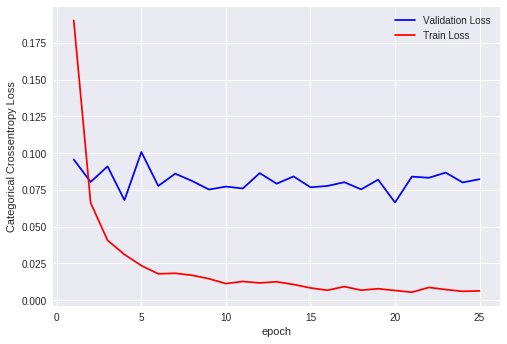

Text(0.5,1,'Accuracy Curves')

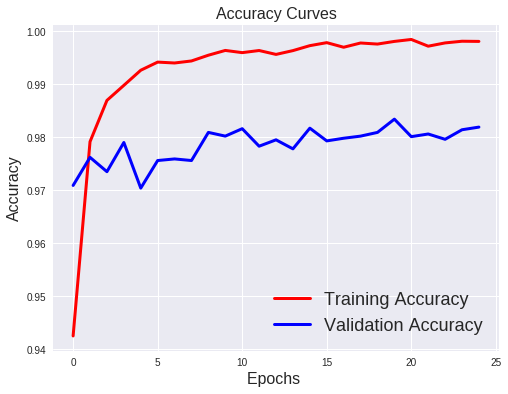

In [24]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations** :
Even after batch Normalization ,there is no much change in the model ,the model is still overfitting .
We need regularize the model using dropout layers

# **MLP+ReLU+AdAM+BatchNorm on hidden layers+Dropout layer**

In [25]:

#stating a model
model_2_reg = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 2 hidden layers with batch normalization and dropout layers
model_2_reg.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2_reg.add(BatchNormalization())
model_2_reg.add(Dropout(0.5))
model_2_reg.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_2_reg.add(BatchNormalization())
model_2_reg.add(Dropout(0.5))
model_2_reg.add(Dense(output_dim, activation = "softmax"))

model_2_reg.summary()

 #configuring the optimizer
model_2_reg.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history2 = model_2_reg.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total para

In [27]:
#evaluating on test-data
[train_loss2,train_acc2] = model_2_reg.evaluate(x_train, y_train)
[test_loss2, test_acc2] = model_2_reg.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss2, test_acc2*100))
train_loss_list.append(train_loss2)
test_loss_list.append(test_loss2)
train_accuracy_list.append(train_acc2)
test_accuracy_list.append(test_acc2)

10000/10000 [==============================] - 1s 91us/step
Evaluation result on Test Data : Loss = 0.058831886628788195, accuracy = 98.32%


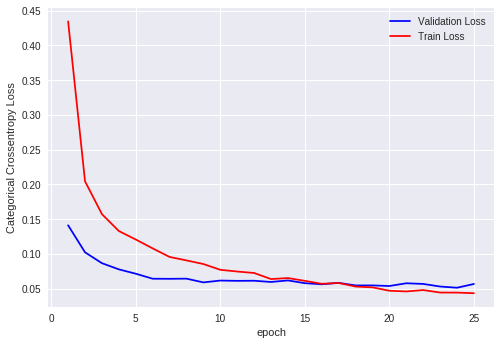

Text(0.5,1,'Accuracy Curves')

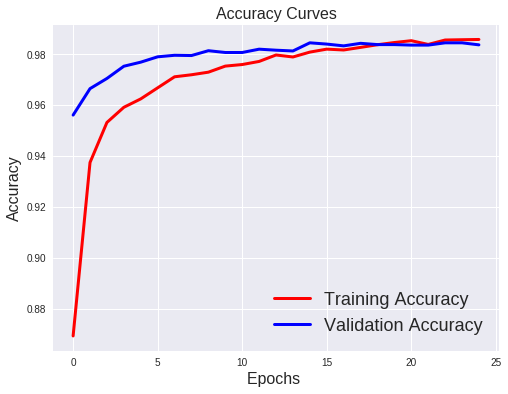

In [28]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations**:
We can see the gap between the curves decreased  after regularization with dropout layers and the accuracy also is pretty good.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


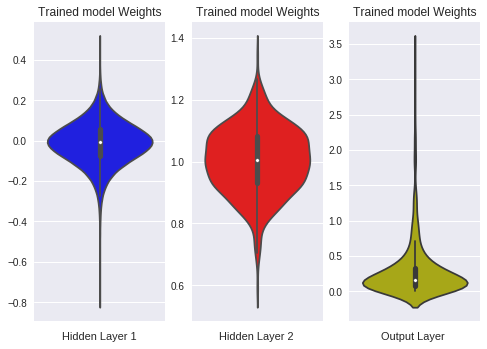

In [26]:
#plotting the optimal weights of each layer
w_optimal2 = model_2_reg.get_weights()

h1_w2 = w_optimal2[0].flatten().reshape(-1,1)
h2_w2 = w_optimal2[2].flatten().reshape(-1,1)
out_w2 = w_optimal2[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w2,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w2, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w2,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **Multi-Layered Perceptron with 3-Hidden layers**

#**MLP+ReLu+Adam**

In [28]:
#stating a model
model_3 = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 3 hidden layers
model_3.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_3.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_3.add(Dense(output_dim, activation = "softmax"))

model_3.summary()

 #configuring the optimizer
model_3.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 67us/step - loss: 0.2104 - acc: 0.9353 - val_loss: 0.1075 - val_acc: 0.9661
Epoch 2/25
60000/60000 [==============================] - 3s 58us/step - loss: 0.

In [29]:
#evaluating on test-data
[test_loss3, test_acc3] = model_3.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss3, test_acc3*100))


10000/10000 [==============================] - 1s 68us/step
Evaluation result on Test Data : Loss = 0.08986579387039931, accuracy = 98.45%


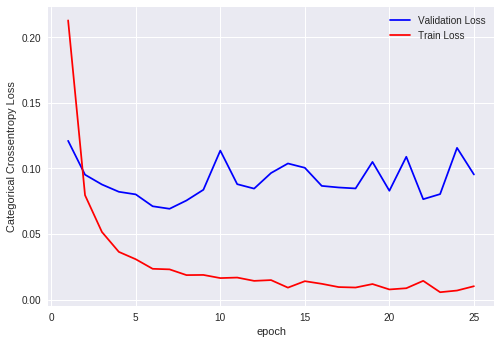

Text(0.5,1,'Accuracy Curves')

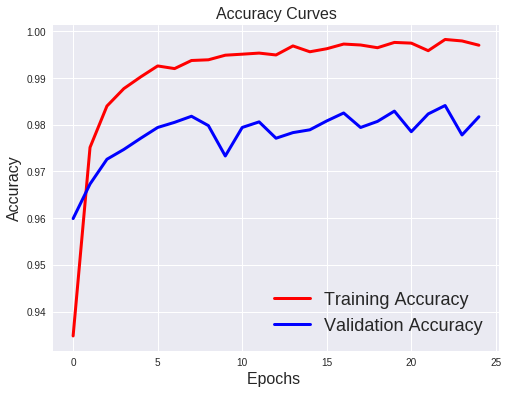

In [31]:
#checking for overfitting 

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history3.history['acc'],'r',linewidth=3.0)
plt.plot(history3.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations** :
Even with 3-hidden layers , the model is still overfitting and there significant gap between train and test loss as we can see in the above figure.


# MLP+Adam+ReLu+Batch Normalization on Hidden layers

In [30]:
#stating a model
model_3_bn = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 3 hidden layers and batch normalization
model_3_bn.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3_bn.add(BatchNormalization())
model_3_bn.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_3_bn.add(BatchNormalization())
model_3_bn.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_3_bn.add(BatchNormalization())

model_3_bn.add(Dense(output_dim, activation = "softmax"))

model_3_bn.summary()

#configuring the optimizer
model_3_bn.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history4 = model_3_bn.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total para

In [31]:
#evaluating on test-data
[test_loss4, test_acc4] = model_3_bn.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss4, test_acc4*100))


10000/10000 [==============================] - 1s 103us/step
Evaluation result on Test Data : Loss = 0.08148813904981607, accuracy = 98.22%


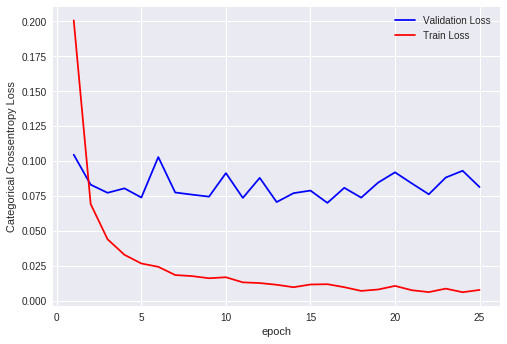

Text(0.5,1,'Accuracy Curves')

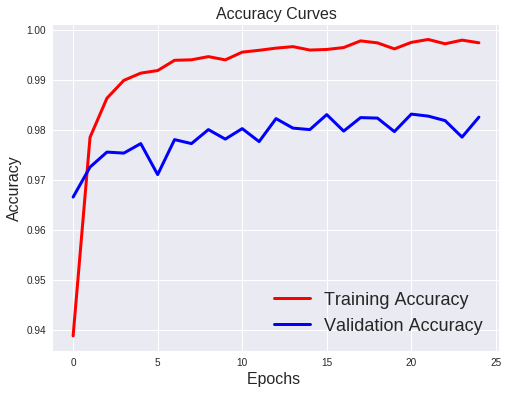

In [34]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history4.history['val_loss']
ty = history4.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history4.history['acc'],'r',linewidth=3.0)
plt.plot(history4.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations** :
Even after batch Normalization ,there is no much change in the model ,the model is still overfitting .
We need regularize the model using dropout layers

# MLP+ReLU+AdAM+BatchNorm on hidden layers+Dropout layer

In [32]:
#stating a model
model_3_reg = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 3 hidden layers with batch normaliztion and dropout layers
model_3_reg.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3_reg.add(BatchNormalization())
model_3_reg.add(Dropout(0.5))
model_3_reg.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_3_reg.add(BatchNormalization())
model_3_reg.add(Dropout(0.5))
model_3_reg.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_3_reg.add(BatchNormalization())
model_3_reg.add(Dropout(0.5))
model_3_reg.add(Dense(output_dim, activation = "softmax"))

model_3_reg.summary()

 #configuring the optimizer
model_3_reg.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history5 = model_3_reg.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
__________

In [33]:
#evaluating on test-data
[train_loss5,train_acc5] = model_3_reg.evaluate(x_train, y_train)
[test_loss5, test_acc5] = model_3_reg.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss5, test_acc5*100))
train_loss_list.append(train_loss5)
test_loss_list.append(test_loss5)
train_accuracy_list.append(train_acc5)
test_accuracy_list.append(test_acc5)

10000/10000 [==============================] - 1s 103us/step
Evaluation result on Test Data : Loss = 0.058371983933990124, accuracy = 98.41%


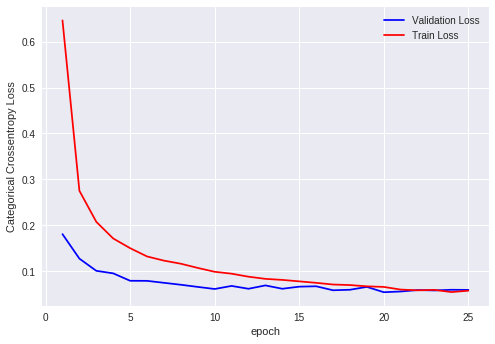

Text(0.5,1,'Accuracy Curves')

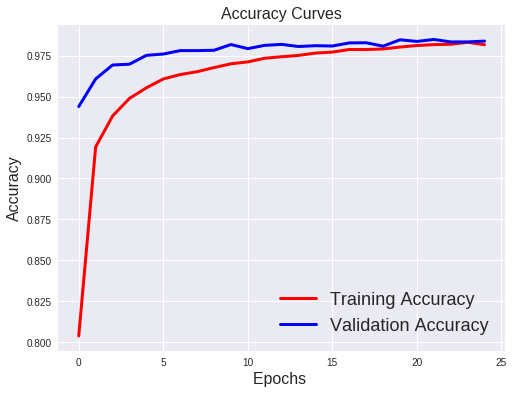

In [37]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history5.history['acc'],'r',linewidth=3.0)
plt.plot(history5.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations**:
We can see the gap between the curves decreased  after regularization with dropout layers and the accuracy also is pretty good.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


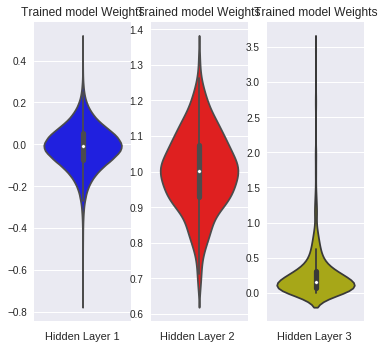

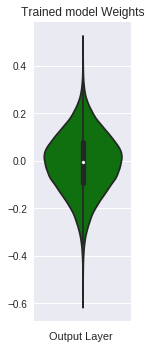

In [38]:
w_optimal3 = model_3_reg.get_weights()

h1_w3 = w_optimal3[0].flatten().reshape(-1,1)
h2_w3 = w_optimal3[2].flatten().reshape(-1,1)
h3_w3 = w_optimal3[4].flatten().reshape(-1,1)
out_w3 = w_optimal3[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
ax = sns.violinplot(y=h1_w3,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w3, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w3,color='y')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w3,color='g')
plt.xlabel('Output Layer ')
plt.show()

# Multi-Layered Perceptron with 5-Hidden layers
# MLP+ReLu+Adam

In [34]:
#stating a model
model_5 = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 5 hidden layers
model_5.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_5.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_5.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_5.add(Dense(64,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)))
model_5.add(Dense(32,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)))
model_5.add(Dense(output_dim, activation = "softmax"))

model_5.summary()

 #configuring the optimizer
model_5.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history6 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________
Trai

In [35]:
#evaluating on test-data
[test_loss6, test_acc6] = model_5.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss6, test_acc6*100))


10000/10000 [==============================] - 1s 73us/step
Evaluation result on Test Data : Loss = 0.10819375661679097, accuracy = 98.11%


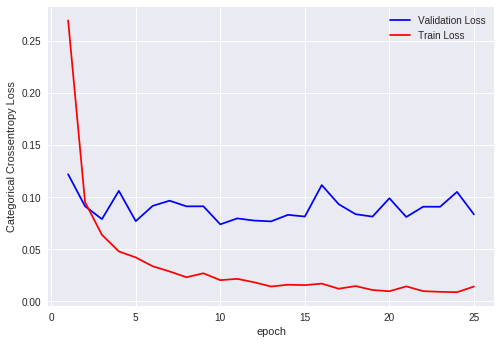

Text(0.5,1,'Accuracy Curves')

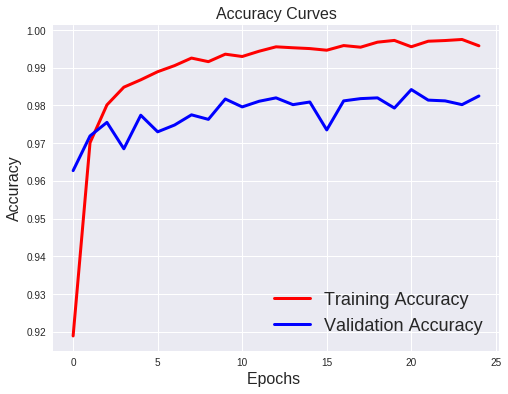

In [40]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history6.history['val_loss']
ty = history6.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history6.history['acc'],'r',linewidth=3.0)
plt.plot(history6.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations :** Even with 5-hidden layers , the model is still overfitting and there significant gap between train and test loss as we can see in the above figure.

# MLP+Adam+ReLu+Batch Normalization on Hidden layers

In [36]:
#stating a model
model_5_bn = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 5 hidden layers and batch normalization
model_5_bn.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_5_bn.add(BatchNormalization())
model_5_bn.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_5_bn.add(BatchNormalization())
model_5_bn.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_5_bn.add(BatchNormalization())
model_5_bn.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)))
model_5_bn.add(BatchNormalization())
model_5_bn.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)))
model_5_bn.add(BatchNormalization())


model_5_bn.add(Dense(output_dim, activation = "softmax"))

model_5_bn.summary()

#configuring the optimizer
model_5_bn.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history7 = model_5_bn.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
__________

In [37]:
#evaluating on test-data
[test_loss7, test_acc7] = model_5_bn.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss7, test_acc7*100))



10000/10000 [==============================] - 1s 125us/step
Evaluation result on Test Data : Loss = 0.07947270207923211, accuracy = 98.11%


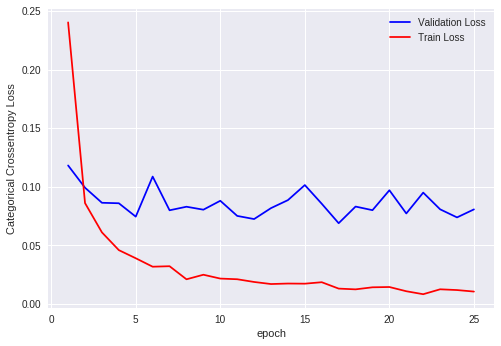

Text(0.5,1,'Accuracy Curves')

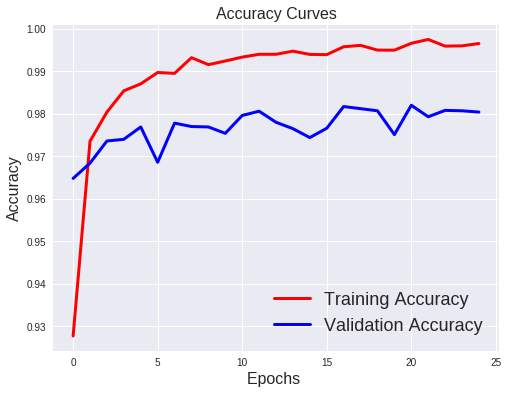

In [42]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history7.history['val_loss']
ty = history7.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history7.history['acc'],'r',linewidth=3.0)
plt.plot(history7.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations :** Even after batch Normalization ,there is no much change in the model ,the model is still overfitting . We need regularize the model using dropout layers

# MLP+ReLU+AdAM+BatchNorm on hidden layers+Dropout layer

In [38]:
#stating a model
model_5_reg = Sequential()

#Acitvation Function :"Relu" ,optimizaer :"Adam" are used throughout the excercise
#Multi-layer perceptron with 5 hidden layers
model_5_reg.add(Dense(512,activation ="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_5_reg.add(BatchNormalization())
model_5_reg.add(Dropout(0.5))
model_5_reg.add(Dense(256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_5_reg.add(BatchNormalization())
model_5_reg.add(Dropout(0.5))
model_5_reg.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_5_reg.add(BatchNormalization())
model_5_reg.add(Dropout(0.5))
model_5_reg.add(Dense(64,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)))
model_5_reg.add(BatchNormalization())
model_5_reg.add(Dropout(0.5))
model_5_reg.add(Dense(32,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)))
model_5_reg.add(BatchNormalization())
model_5_reg.add(Dropout(0.5))
model_5_reg.add(Dense(output_dim, activation = "softmax"))

model_5_reg.summary()

 #configuring the optimizer
model_5_reg.compile(optimizer ="adam" ,loss ="categorical_crossentropy" ,metrics =["accuracy"])

#fitting the model
history8 = model_5_reg.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
__________

In [39]:
#evaluating on test-data
[train_loss8,train_acc8] = model_5_reg.evaluate(x_train, y_train)
[test_loss8, test_acc8] = model_5_reg.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss8, test_acc8*100))
train_loss_list.append(train_loss8)
test_loss_list.append(test_loss8)
train_accuracy_list.append(train_acc8)
test_accuracy_list.append(test_acc8)


10000/10000 [==============================] - 1s 127us/step
Evaluation result on Test Data : Loss = 0.08171141215778188, accuracy = 98.34%


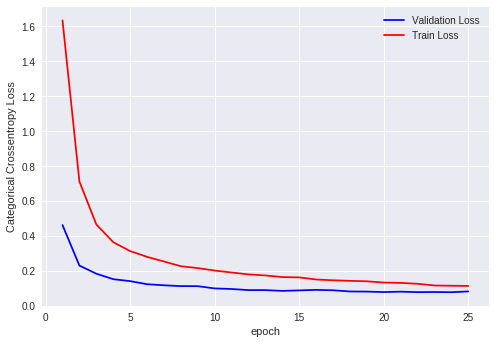

Text(0.5,1,'Accuracy Curves')

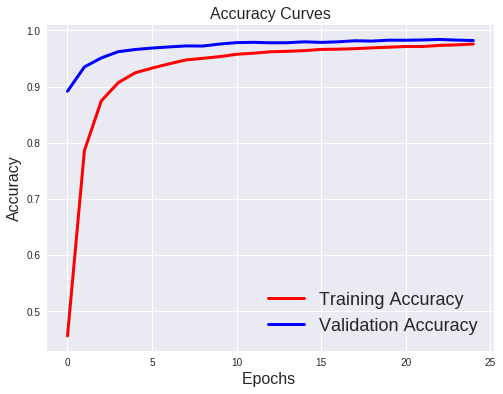

In [46]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history8.history['val_loss']
ty = history8.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history8.history['acc'],'r',linewidth=3.0)
plt.plot(history8.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


**Observations**:
We can see the gap between the curves decreased  after regularization with dropout layers and the accuracy also is pretty good.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output Layer ')

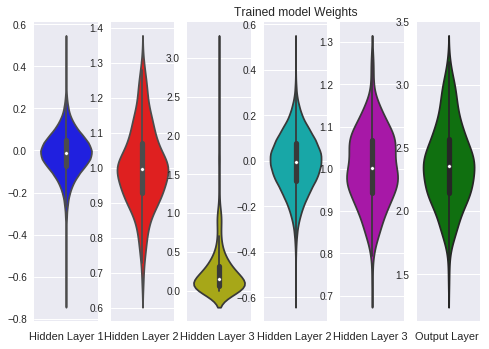

In [51]:
w_optimal5 = model_5_reg.get_weights()

h1_w5 = w_optimal5[0].flatten().reshape(-1,1)
h2_w5 = w_optimal5[2].flatten().reshape(-1,1)
h3_w5 = w_optimal5[4].flatten().reshape(-1,1)
h4_w5 = w_optimal5[6].flatten().reshape(-1,1)
h5_w5 = w_optimal5[8].flatten().reshape(-1,1)
out_w5 = w_optimal5[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
ax = sns.violinplot(y=h1_w5,color='b')
plt.xlabel('Hidden Layer 1')


plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w5, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w5,color='y')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w5, color='c')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w5,color='m')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w5,color='g')
plt.xlabel('Output Layer ')


# Conclusions:

In [40]:
#reporting the results in a table
order_list = [0,1,2]
hidden_layers_list =[2,3,5]

for i in order_list:
  t= PrettyTable()
  t.field_names =["metric/parameter" , "result"]
  t.add_row (["Model" ,"Classification"])
  t.add_row(["Algorithm","MLP"])
  t.add_row (["Hidden-layers" ,hidden_layers_list[i]])
  t.add_row(["Activation","Relu"])
  t.add_row(["optimizer","Adam"])
  t.add_row(["Batch-Normalization","Yes"])
  t.add_row(["Dropout","Yes"])
  t.add_row (["Train-logloss" ,round(train_loss_list[i],2)])
  t.add_row (["Test-logloss" ,round(test_loss_list[i],2)])
  t.add_row(["Train-accuracy",round(train_accuracy_list[i]*100,2)])
  t.add_row(["Test-accuracy",round(test_accuracy_list[i]*100,2)])
  print(t)
    

+---------------------+----------------+
|   metric/parameter  |     result     |
+---------------------+----------------+
|        Model        | Classification |
|      Algorithm      |      MLP       |
|    Hidden-layers    |       2        |
|      Activation     |      Relu      |
|      optimizer      |      Adam      |
| Batch-Normalization |      Yes       |
|       Dropout       |      Yes       |
|    Train-logloss    |      0.01      |
|     Test-logloss    |      0.06      |
|    Train-accuracy   |     99.77      |
|    Test-accuracy    |     98.32      |
+---------------------+----------------+
+---------------------+----------------+
|   metric/parameter  |     result     |
+---------------------+----------------+
|        Model        | Classification |
|      Algorithm      |      MLP       |
|    Hidden-layers    |       3        |
|      Activation     |      Relu      |
|      optimizer      |      Adam      |
| Batch-Normalization |      Yes       |
|       Dropout 